Mean Squared Error: 3.75
R^2 Score: 0.85


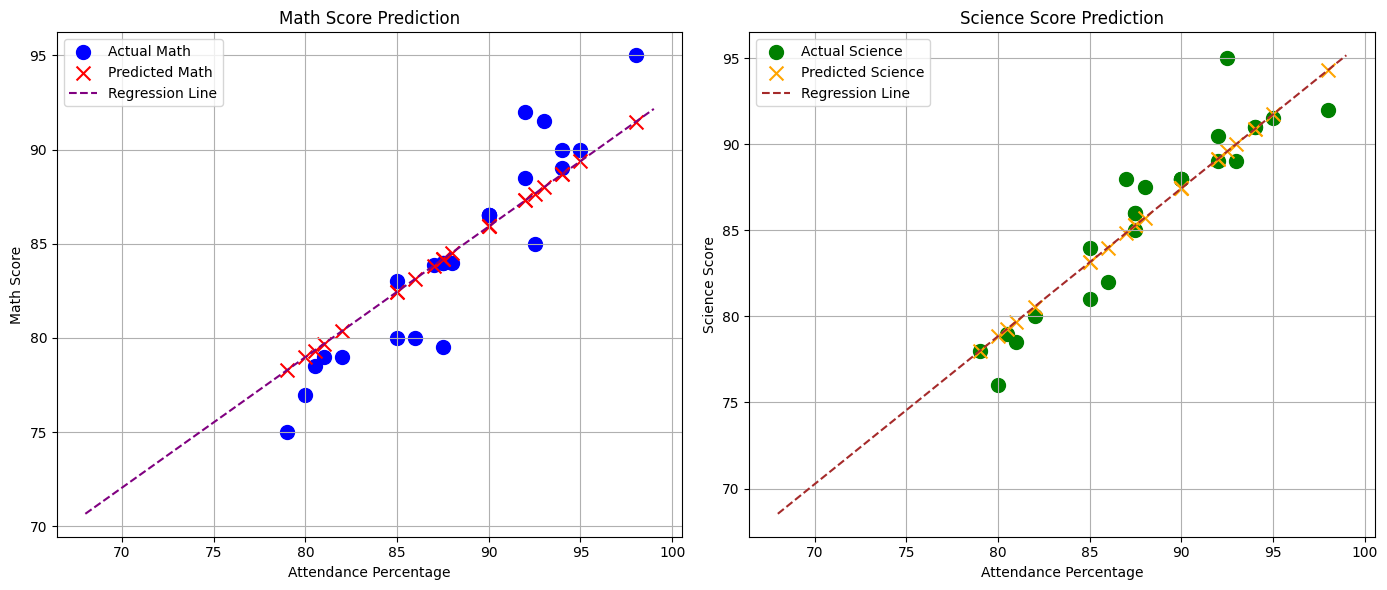

Model saved successfully!


In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from joblib import dump

import warnings
warnings.filterwarnings("ignore", category=UserWarning)


# Load Data
df = pd.read_csv("student.csv")


# Features and targets
X = df[['Attendance_Percentage']]
y = df[['Math_Score', 'Science_Score']]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multi-output regression
model = MultiOutputRegressor(LinearRegression())
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred, multioutput='uniform_average')
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Plotting
plt.figure(figsize=(14,6))

# Math Score Plot
plt.subplot(1,2,1)
plt.scatter(X_test, y_test['Math_Score'], color='blue', label='Actual Math', s=100)
plt.scatter(X_test, y_pred[:,0], color='red', label='Predicted Math', marker='x', s=100)

# Regression line
attendance_range = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
math_line = model.predict(attendance_range)[:,0]
plt.plot(attendance_range, math_line, color='purple', linestyle='--', label='Regression Line')

plt.xlabel('Attendance Percentage')
plt.ylabel('Math Score')
plt.title('Math Score Prediction')
plt.legend()
plt.grid(True)

# Science Score Plot
plt.subplot(1,2,2)
plt.scatter(X_test, y_test['Science_Score'], color='green', label='Actual Science', s=100)
plt.scatter(X_test, y_pred[:,1], color='orange', label='Predicted Science', marker='x', s=100)

# Regression line
science_line = model.predict(attendance_range)[:,1]
plt.plot(attendance_range, science_line, color='brown', linestyle='--', label='Regression Line')

plt.xlabel('Attendance Percentage')
plt.ylabel('Science Score')
plt.title('Science Score Prediction')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Save the model
dump(model, 'attendance_model.joblib')
print("Model saved successfully!")